# 시그모이드 함수 그리기

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sigmold(x):
    return 1 / (1+np.exp(-x))

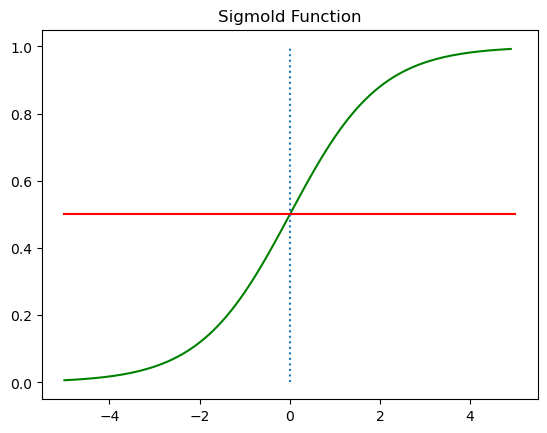

In [6]:
# w의 값에 따라 경사도가 변한다.
# 주어진 데이터에 가장 적합한 w와 b를 구하는 것이 목적
x = np.arange(-5, 5, 0.1)
y = sigmold(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [0,1], ':')  # 가운데 세로 점선
plt.plot([-5,5], [0.5, 0.5], 'r')  # 가운데 가로 실선
plt.title('Sigmold Function')
plt.show()

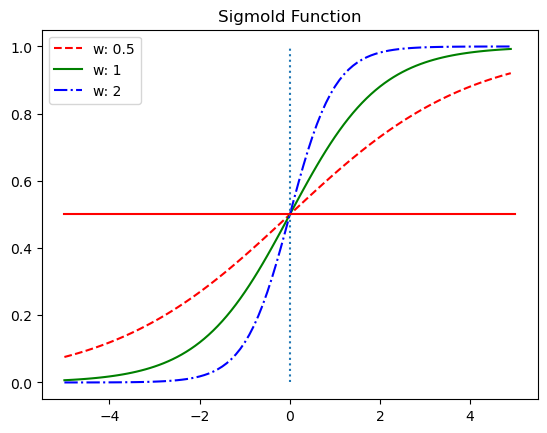

In [6]:
x = np.arange(-5, 5, 0.1)
y1 = sigmold(0.5*x)
y2 = sigmold(1.0*x)
y3 = sigmold(2*x)

plt.plot(x, y1, 'r--', label='w: 0.5')
plt.plot(x, y2, 'g', label='w: 1')
plt.plot(x, y3, 'b-.', label='w: 2')
plt.plot([0,0], [0,1], ':')  # 가운데 세로 점선
plt.plot([-5,5], [0.5, 0.5], 'r')  # 가운데 가로 실선
plt.legend()
plt.title('Sigmold Function')
plt.show()

# 유방암 판별 예측

## 패키지 로딩

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [8]:
breast = load_breast_cancer()
# print(breast.DESCR)
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
display(df.head())
print(df.shape)
print(df['target'].value_counts())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 31)
target
1    357
0    212
Name: count, dtype: int64


In [9]:
print(df.isna().sum())
print(df.describe())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    5

## 종속변수/독립변수 선택

In [10]:
x = breast.data
y = breast.target

## 데이터 스케일링

In [11]:
scaled_x = StandardScaler().fit_transform(x)

## 학습 데이터/평가 데이터 분리

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=0, stratify=y)
# stratify = y : 학습과 평가 데이터 분리 시, 종속변수의 클래스별 비율을 고려해서 분리

In [13]:
unique, counts = np.unique(y_train, return_counts=True)   # return_counts=True 까지 넣으면 counts 값도 가져옴
print(dict(zip(unique, counts)))

{0: 148, 1: 250}


## 모델 생성
- 회귀계수 최적화 옵션
    - solver: 최적화 문제에 사용할 알고리즘
    >- 'lbfgs': solver의 기본값, CPU 코어 수가 많다면 최적화를 병렬로 수행할 수 있다.
    >- 'liblinear': 작은 데이터에 적합한 알고리즘
    >- 'sag', 'saga': 확률적경사하강법을 기반으로 한 알고리즘으로 대용량 데이터에 적합
    >- 'newton-cg', 'sag', 'saga', 'linlinear'만 다항 손실을 처리할 수 있다. 즉, 멀티클래스 분류 모델에 사용 가능
    - solver에 따른 규제 지원 사항
    >- newton-cg, lbfgs, sag: L2
    >- linlinear, saga: L1, L2
    - multi_class: 다중클래서분류 문제의 상황에서 접근 방식을 지정
    >- 'ovr': 이진분류문제인 sigmold 함수를 이용하여 결과 예측
    >- 'multinomial': 각 클래스에 대한 softmax 확률 값으로 다중분류를 수행
    - C: 규제 강도의 역수, C의 값이 작을수록 규제 강도가 커지고 모델이 단순해진다.
    - max_iter: solver가 수렴하는데 필요한 반복 횟수 (default:100)

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 모델 예측

In [15]:
y_hat = model.predict(x_test)
print(y_hat[:20])
print(y_test[:20])

[0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


## Confusion Matrix
- 혼동 행렬 함수는 행을 True(실제 상황), 열을 False(예측 상황) 값으로 이용하고, 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값의 정렬된 순서로 사용한다. (0: Negative, 1: Positive)

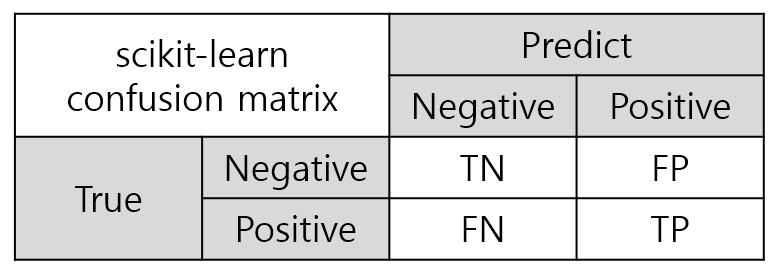

In [16]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[ 61   3]
 [  4 103]]


## 평가지표

In [17]:
accuracy = accuracy_score(y_test, y_hat)
print(f'정확도: {accuracy:.2f}')   # (61+103) / (61+3+4+103)
precision = precision_score(y_test, y_hat)
print(f'정밀도: {precision:.2f}')  # (103) / (3+103)
recall = recall_score(y_test, y_hat)
print(f'재현율: {recall:.2f}')  # 103 / (4+103)
pred_proba_positive = model.predict_proba(x_test)[:,1]  # positive로 예측한 확률값 취합
# print(pred_proba_positive[:4])
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_positive)
roc_data = pd.DataFrame(np.concatenate([fpr.reshape(-1, 1), tpr.reshape(-1, 1), thresholds.reshape(-1, 1)], axis = 1), columns = ['FPR', 'TPR', 'THRESHOLDS'])
display(roc_data)
auc = roc_auc_score(y_test, pred_proba_positive)
print(f'AUC: {auc:.2f}')

정확도: 0.96
정밀도: 0.97
재현율: 0.96


,FPR,TPR,THRESHOLDS
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.009346,9.999997e-01
2,0.000000,0.897196,9.059276e-01
3,0.015625,0.897196,9.033250e-01
4,0.015625,0.915888,8.819721e-01
5,0.031250,0.915888,8.745867e-01
6,0.031250,0.953271,6.018401e-01
7,0.046875,0.953271,5.372206e-01
8,0.046875,0.971963,4.930703e-01
9,0.062500,0.971963,4.322792e-01


AUC: 1.00


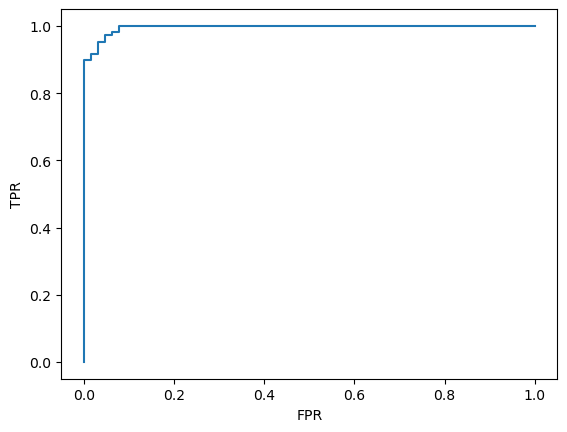

In [18]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 최적의 임계값 찾기
- TPR(실제 양성을 양성이라고 판단한 비율)과 FPR(음성을 양성이라고 잘못 판단한 위양성율)의 차이가 가장 큰 경우의 임계치가 최적의 임계값이라고 할 수 있다.

In [19]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print(f'최적의 임계값:{optimal_threshold:.3f}')

최적의 임계값:0.493


## 예측 확률
- 평가 데이터의 각 레코드별 개별 클래스 예측 확률값 확인
- 분류 임계값: 0.5

In [20]:
prob = model.predict_proba(x_test)
prob_df = pd.DataFrame(np.concatenate([np.round(prob[:10], 3), y_hat[:10].reshape(-1,1)], axis=1), 
                       columns=['negative(0)','positive(1)','predict class'])
display(prob_df)

,negative(0),positive(1),predict class
0,1.000,0.000,0.0
1,0.125,0.875,1.0
2,0.999,0.001,0.0
3,0.015,0.985,1.0
4,1.000,0.000,0.0
5,0.037,0.963,1.0
6,1.000,0.000,0.0
7,1.000,0.000,0.0
8,0.994,0.006,0.0
9,1.000,0.000,0.0


## 임계값 변화에 따른 재현율과 정밀도 변화 확인

In [21]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
    return np.where(prob >= threshold, 1, 0)

pred_1 = threshold_filter(pred_proba_positive, 0.5)
pred_2 = threshold_filter(pred_proba_positive, 0.6)
pred_3 = threshold_filter(pred_proba_positive, 0.8)

print('======= threshold: 0.5 =======')
print(classification_report(y_test, pred_1))
print('-'*60)
print('======= threshold: 0.6=======')
print(classification_report(y_test, pred_2))
print('-'*60)
print('======= threshold: 0.8 =======')
print(classification_report(y_test, pred_3))
print('-'*60)

======= threshold: 0.5 =======
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

------------------------------------------------------------
======= threshold: 0.6=======
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.98      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

------------------------------------------------------------
======= threshold: 0.8 =======
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.98

## solver별 성능평가 비교

In [25]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    pred_proba_positive = model.predict_proba(x_test)[:,1]
    print(f'solver:{solver}, accuracy:{accuracy_score(y_test, y_hat):.3f}, auc:{roc_auc_score(y_test, pred_proba_positive):.3f}')

solver:lbfgs, accuracy:0.959, auc:0.996
solver:liblinear, accuracy:0.959, auc:0.996
solver:newton-cg, accuracy:0.959, auc:0.996
solver:sag, accuracy:0.959, auc:0.996
solver:saga, accuracy:0.959, auc:0.996


# [실습] 개인 신용도 대출 가능 여부 확인

## 패키지 로딩

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 로드 및 확인

In [3]:
df_loan = pd.read_csv('./dataset/Personal_Loan.csv')
print(df_loan.shape)
display(df_loan.head())

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 데이터 전처리

### 컬럼 제거

In [4]:
df_loan.drop(['ID','ZIP Code'], axis=1, inplace=True)
df_loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 독립변수/종속변수 분리

In [5]:
x = df_loan.drop('Personal Loan', axis=1)
y = df_loan['Personal Loan']

## 데이터 스케일링

In [6]:
scaled_x = StandardScaler().fit_transform(x)

## 학습 데이터/평가 데이터 분리

In [7]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, stratify=y, random_state=0)

## 모델 생성
- 로지스틱 회귀 모형의 가중치 해석
>- 로지스틱 회귀 모형의 가중치는 지수변환(np.exp()을 취한다)을 해 주면 odds rate가 나온다. (오즈비 = 성공할 확률 / 실패할 확률)
>- 대출 여부에 영향을 미치는 변수의 오즈비가 1보다 큰 경우 해당 변수가 대출이 승인되는 데 높은 비율로 영향을 미친다고 해석할 수 있다.
>- ex) Income 컬럼의 오즈비가 12인 경우, 소득이 대출 승인 여부에 미치는 영향이 대출 거부보다 대출이 승인될 확률의 12배 높다는 의미이다.

In [12]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

coef = model.coef_.squeeze(axis=0)    # 차원 축소  2차원 -> 1차원
print('추정 계수(가중치):', coef)
odds_rate = np.exp(model.coef_).squeeze(axis=0)   # model.coef의 지수함수
print('추정 계수(Odds비):', odds_rate)
coef_df = pd.DataFrame({'가중치':coef, 'Odds비':odds_rate}, index=x.columns)
print(coef_df)

추정 계수(가중치): [-0.22480373  0.33712955  2.49269246  0.77553498  0.19167452  1.41140133
 -0.02953423 -0.31021898  0.89839435 -0.30621769 -0.52708743]
추정 계수(Odds비): [ 0.79867296  1.40092054 12.09379436  2.17175366  1.2112762   4.1016992
  0.97089765  0.73328637  2.45565703  0.73622634  0.59032182]
                         가중치      Odds비
Age                -0.224804   0.798673
Experience          0.337130   1.400921
Income              2.492692  12.093794
Family              0.775535   2.171754
CCAvg               0.191675   1.211276
Education           1.411401   4.101699
Mortgage           -0.029534   0.970898
Securities Account -0.310219   0.733286
CD Account          0.898394   2.455657
Online             -0.306218   0.736226
CreditCard         -0.527087   0.590322


In [13]:
print(df_loan[df_loan['Personal Loan'] == 0]['Income'].mean())
print(df_loan[df_loan['Personal Loan'] == 1]['Income'].mean())

66.23738938053097
144.74583333333334


In [14]:
print(df_loan[df_loan['Personal Loan'] == 0]['Education'].mean())
print(df_loan[df_loan['Personal Loan'] == 1]['Education'].mean())

1.8435840707964601
2.2333333333333334


## 모델 예측

In [15]:
y_hat = model.predict(x_test)
print('실제값:', y_test[:20].values)
print('예측값:', y_hat[:20])

실제값: [1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0]
예측값: [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]


## 모델 성능 측정

Predict        
               대출불허(0) 대출승인(1)
Actual 대출불허(0)    1335      21
       대출승인(1)      55      89

정확도:0.949
정밀도:0.809


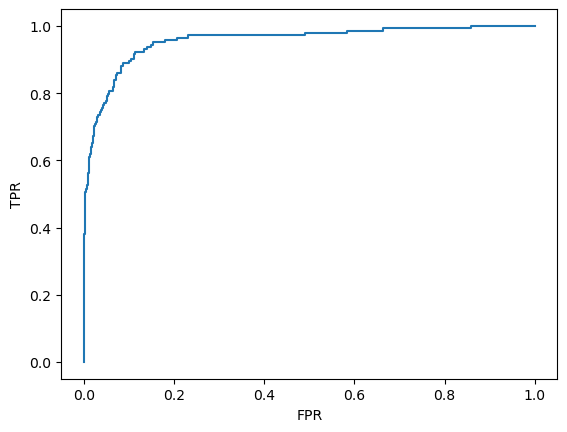

AUC:0.957


In [16]:
cf = confusion_matrix(y_test, y_hat)
cf_df = pd.DataFrame(cf, index=[['Actual','Actual'],['대출불허(0)','대출승인(1)']], columns=[['Predict','Predict'],['대출불허(0)','대출승인(1)']])
display(cf_df)
print(f'정확도:{accuracy_score(y_test, y_hat):.3f}')
print(f'정밀도:{precision_score(y_test, y_hat):.3f}')
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])

plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print(f'AUC:{roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.3f}')

## 교차검증

In [20]:
scores = cross_validate(model, scaled_x, y, cv=10, scoring=['accuracy', 'precision', 'roc_auc'])  # cross_validate 는 모델이 분류라면, 계층 모형 사용 / 다르다면 K-Fold
# print(scores)
for key, val in scores.items():
    print('평가지표:', key)
    print(f'평균값:{np.mean(val):.3f}')

평가지표: fit_time
평균값:0.015
평가지표: score_time
평균값:0.003
평가지표: test_accuracy
평균값:0.950
평가지표: test_precision
평균값:0.812
평가지표: test_roc_auc
평균값:0.958


## 학습이 완료된 모델을 파일로 저장

In [21]:
import joblib
joblib.dump(model, './loan.pkl')   # 모델 학습 결과를 pickle 파일로 저장

['./loan.pkl']

In [22]:
loaded_model = joblib.load('./loan.pkl')
score = loaded_model.score(x_test, y_test)
print(score)

0.9493333333333334
